In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
from keras.layers import Dense, Flatten, Conv2D, Dropout

In [4]:
from keras import Sequential

In [5]:
letters = pd.read_csv('/content/slmnist.csv')

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from keras.callbacks import EarlyStopping

In [9]:
letters.head()

,1,142,143,146,148,149,149.1,149.2,150,151,...,0.1,15,55,63,37.2,61.1,77.2,65.1,38.1,23
0,0,141,142,144,145,147,149,150,151,152,...,173,179,179,180,181,181,182,182,183,183
1,1,156,157,160,162,164,166,169,171,171,...,181,197,195,193,193,191,192,198,193,182
2,3,63,26,65,86,97,106,117,123,128,...,175,179,180,182,183,183,184,185,185,185
3,1,156,160,164,168,172,175,178,180,182,...,108,107,106,110,111,108,108,102,84,70
4,0,159,163,167,168,170,173,175,178,178,...,173,233,235,235,236,235,235,236,235,235


In [10]:
letters['1']= pd.Categorical(letters['1'])

In [11]:
letters['1']=letters['1'].cat.codes

In [12]:
y = to_categorical(letters['1'])

In [13]:
X = letters.drop('1', axis=1).values

In [14]:
X.shape

(1999, 784)

In [15]:
X = X.reshape(1999,28,28)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [20]:
stopper = EarlyStopping(patience=3, monitor='val_loss')

In [18]:
from keras.layers import Dropout, BatchNormalization, Flatten, MaxPool2D

In [19]:
model = Sequential()

In [21]:
model.add(Conv2D(12, kernel_size=(3), activation='relu', input_shape=(28,28,1), padding='same'))

In [22]:
model.add(Dropout(0.2))

In [23]:
model.add(Conv2D(15, kernel_size=(4), activation='relu'))

In [24]:
model.add(BatchNormalization())

In [25]:
model.add(Conv2D(8, activation='relu', kernel_size=(3)))

In [26]:
model.add(Flatten())

In [27]:
model.add(Dense(4, activation='softmax'))

In [28]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.fit(X_train, y_train, epochs=15, batch_size=500, validation_split=0.2, callbacks=[stopper])

Epoch 1/15
3/3 [==============================] - 5s 949ms/step - loss: 1.5449 - accuracy: 0.3385 - val_loss: 2.0665 - val_accuracy: 0.3469
Epoch 2/15
3/3 [==============================] - 3s 907ms/step - loss: 1.0058 - accuracy: 0.5653 - val_loss: 1.2329 - val_accuracy: 0.4125
Epoch 3/15
3/3 [==============================] - 4s 918ms/step - loss: 0.5741 - accuracy: 0.7819 - val_loss: 0.7193 - val_accuracy: 0.6844
Epoch 4/15
3/3 [==============================] - 2s 768ms/step - loss: 0.3391 - accuracy: 0.8866 - val_loss: 0.5650 - val_accuracy: 0.8250
Epoch 5/15
3/3 [==============================] - 2s 810ms/step - loss: 0.1613 - accuracy: 0.9578 - val_loss: 0.5544 - val_accuracy: 0.7656
Epoch 6/15
3/3 [==============================] - 2s 775ms/step - loss: 0.1194 - accuracy: 0.9703 - val_loss: 0.5576 - val_accuracy: 0.7281
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.0798 - accuracy: 0.9797 - val_loss: 0.4840 - val_accuracy: 0.7812
Epoch 8/15
3/3 [=======

In [32]:
model2 = Sequential()

In [33]:
model2.add(Conv2D(8, kernel_size=(3), activation='relu', input_shape=(28,28,1)))

In [34]:
model2.add(Conv2D(8, kernel_size=(3), activation='relu'))

In [35]:
model2.add(Conv2D(8, kernel_size=(3), activation='relu'))

In [36]:
model2.add(Flatten())

In [37]:
model2.add(Dense(4, activation='softmax'))

In [38]:
model2.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model2.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=600,callbacks=[stopper])

Epoch 1/15
3/3 [==============================] - 3s 566ms/step - loss: 50.1161 - accuracy: 0.2557 - val_loss: 108.4609 - val_accuracy: 0.2531
Epoch 2/15
3/3 [==============================] - 1s 253ms/step - loss: 91.5120 - accuracy: 0.2557 - val_loss: 20.6569 - val_accuracy: 0.3438
Epoch 3/15
3/3 [==============================] - 1s 439ms/step - loss: 15.1447 - accuracy: 0.3331 - val_loss: 8.2856 - val_accuracy: 0.5344
Epoch 4/15
3/3 [==============================] - 2s 481ms/step - loss: 9.1413 - accuracy: 0.5145 - val_loss: 8.0497 - val_accuracy: 0.5688
Epoch 5/15
3/3 [==============================] - 1s 277ms/step - loss: 6.3140 - accuracy: 0.6028 - val_loss: 5.1174 - val_accuracy: 0.5188
Epoch 6/15
3/3 [==============================] - 1s 250ms/step - loss: 3.5446 - accuracy: 0.6341 - val_loss: 0.3855 - val_accuracy: 0.8781
Epoch 7/15
3/3 [==============================] - 1s 275ms/step - loss: 0.4286 - accuracy: 0.8999 - val_loss: 0.3988 - val_accuracy: 0.8781
Epoch 8/15
3/3

In [45]:
layer_1 = model2.layers[0]

In [55]:
layer_1.get_weights()[0].shape

(3, 3, 1, 8)

In [56]:
weights1 = layer_1.get_weights()[0]

In [57]:
kernel_11 = weights1[:,:,0,0]

In [58]:
kernel_11

array([[-0.11412837, -0.1587967 , -0.22314899],
       [-0.23171964, -0.15278035, -0.11922179],
       [ 0.00569952, -0.05724861, -0.15821204]], dtype=float32)

In [60]:
sample = X_train[6]

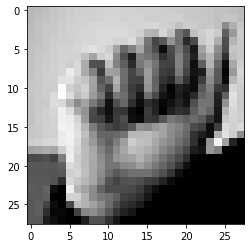

In [87]:
plt.imshow(sample, cmap='gray')

In [83]:
def convolution(inp, kernel, ks):
  conv=np.zeros((inp.shape[0], inp.shape[1]))
  for r in range(inp.shape[0]-ks):
    for c in range(inp.shape[1]-ks):
      conv[r,c] = (inp[r:r+ks, c:c+ks] *kernel).sum()
  return conv


In [85]:
res1 = convolution(sample, kernel_11, 3)

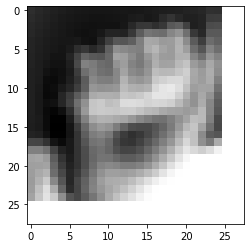

In [88]:
plt.imshow(res1, cmap='gray')

In [90]:
kernel12= weights1[:,:,0,5]

In [91]:
res2 = convolution(sample, kernel12, 3)

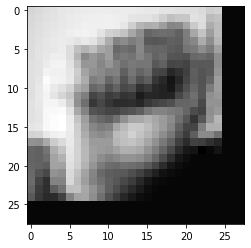

In [93]:
plt.imshow(res2, cmap='gray')

In [103]:
weights2 = model2.layers[1].get_weights()[0]

In [104]:
weights2.shape

(3, 3, 8, 8)

In [105]:
kernel21= weights2[:,:,0,0]

In [106]:
res3 = convolution(res2, kernel21, 3)

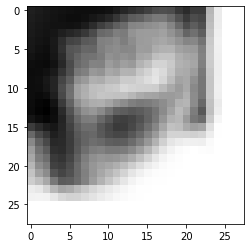

In [107]:
plt.imshow(res3, cmap='gray')